# Modeling and Simulation in Python

Project 2

Maalvika Bhat & Richard Gao

In [13]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [14]:
# kilogram = UNITS.kilogram
# kelvin = UNITS.kelvin
# watt = UNITS.watt
# joule = UNITS.joule
# degC = UNITS.celsius

In [15]:
# m_solid = .05 * kilogram
# latent_heat_fusion = 3.3 * 10 ** 5 * joule / kilogram
m_solid = .05 
latent_heat_fusion = 3.3 * 10 ** 5
q = m_solid * latent_heat_fusion;

In [16]:
# def rate_of_heat_flow(thermal_conductivity_factor, surface_area, delta_temp, thickness):
#     return (-1 * thermal_conductivity_factor * surface_area * delta_temp) / thickness

In [17]:
def make_system(thermal_conductivity_factor, surface_area, delta_temp, thickness):
    """Makes a System object with the given parameters.
    returns: System object
    """
    init = State(thermal_energy_plate = q,
                 thermal_energy_ice = 0)
    
    t0 = 0
    t_end = 100
    dt = .1
    
    return System(locals())

In [18]:
def update_func(state, dt, system):
    unpack(system)
    thermal_energy_plate, thermal_energy_ice = state
    
    deltaQ = (-1 * thermal_conductivity_factor * surface_area * delta_temp) / thickness
    
    thermal_energy_plate += deltaQ * dt
    thermal_energy_ice -= deltaQ * dt
    
    return State(thermal_energy_plate=thermal_energy_plate, thermal_energy_ice=thermal_energy_ice)

In [21]:
def run_simulation(system, update_func):
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    steps = linspace(t0, t_end, int(t_end / dt))
    timesteps = Series(steps)
    
    for t in timesteps.index[:-1]:
        frame.row[timesteps[t+1]] = update_func(frame.row[timesteps[t]], dt, system)
        
    return frame

In [23]:
system = make_system(204, 3, 23, .02) #thermal_conductivity_factor, surface_area, delta_temp, thickness
results = run_simulation(system, update_func)
# results.head()

,thermal_energy_plate,thermal_energy_ice
0.000000,16500.0,0.0
0.100100,-53880.0,70380.0
0.200200,-124260.0,140760.0
0.300300,-194640.0,211140.0
0.400400,-265020.0,281520.0
0.500501,-335400.0,351900.0
0.600601,-405780.0,422280.0
0.700701,-476160.0,492660.0
0.800801,-546540.0,563040.0
0.900901,-616920.0,633420.0


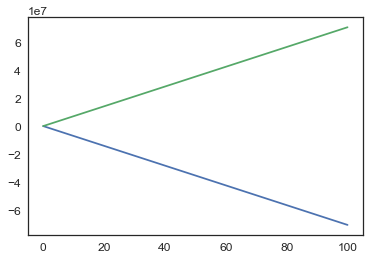

In [27]:
results.thermal_energy_plate.plot()
results.thermal_energy_ice.plot()